<a href="https://colab.research.google.com/github/AshilPrasad/portfolioProject/blob/main/big_mart_sales_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ABOUT DATA SET**

Retail is another industry which extensively uses analytics to optimize business processes. Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques. As the name suggests, this data comprises of transaction records of a sales store. The data has 8523 rows of 12 variables
https://www.kaggle.com/code/midouazerty/bigmart-sales-data-set-for-beginner/input







## **importing data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('/content/bigmart_sales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Exploring Dataset



In [2]:
df.shape

(8523, 12)

In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
##print first 5 rows of the dataset
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#print last 5 rows of the dataset
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#check for data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

data visualaization

In [10]:
con=df.groupby("Item_Type")["Item_Type"].count()
con


Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

<Axes: xlabel='Item_Type'>

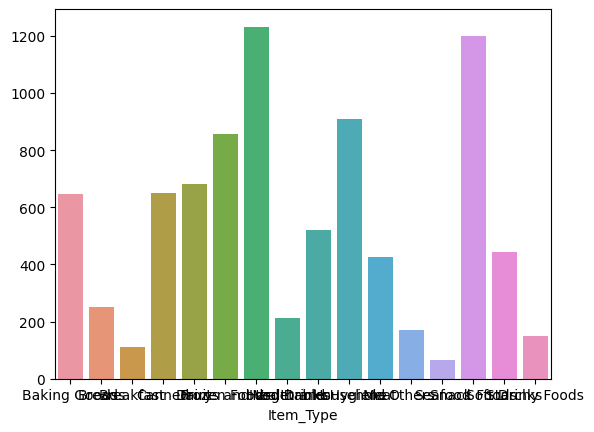

In [11]:
sns.barplot(x=con.index, y=con.values)

In [12]:
cont=df["Outlet_Size"].value_counts()
cont

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

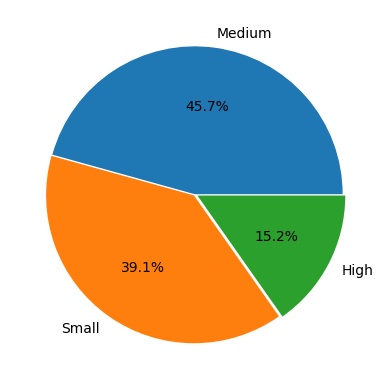

In [13]:
plt.pie(cont.values,labels=cont.index,autopct='%0.1f%%',explode=[0,0.01,0.02])
plt.show()

In [14]:
loc=df["Outlet_Location_Type"].value_counts()
loc

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<Axes: >

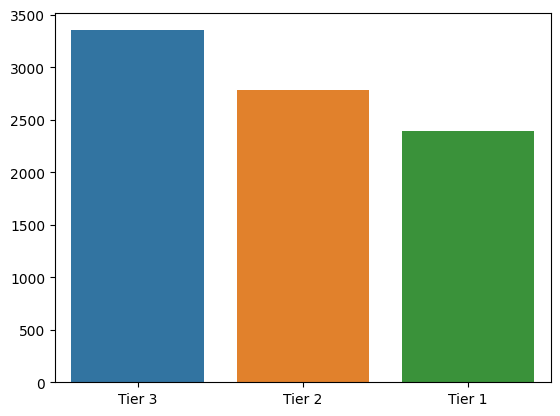

In [15]:
sns.barplot(x=loc.index,y=loc.values)

In [16]:
out=df["Outlet_Type"].value_counts()
out

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

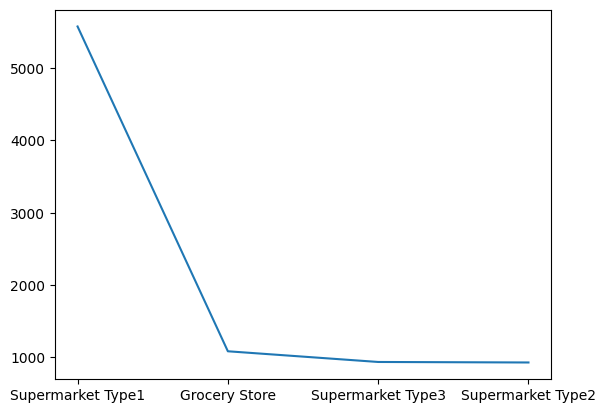

In [17]:
plt.plot(out.index,out.values)
plt.show()

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-19-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

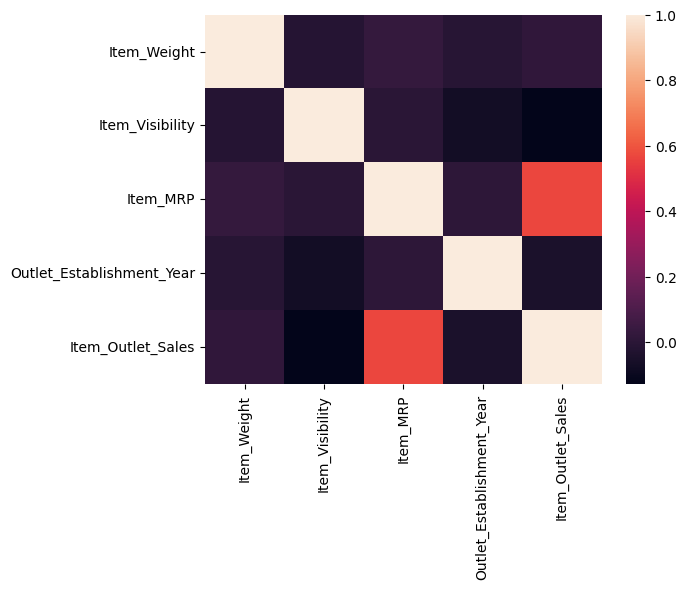

In [19]:
sns.heatmap(df.corr())

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

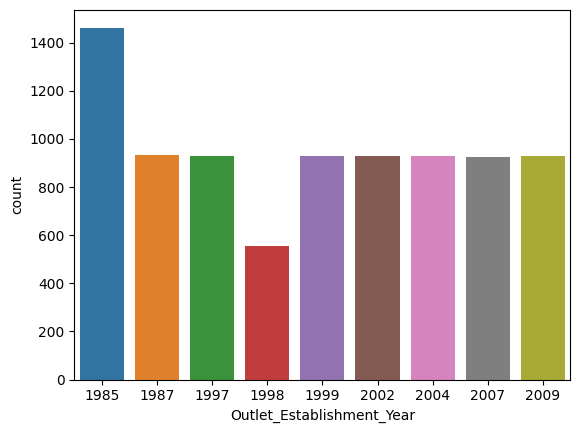

In [20]:
sns.countplot(x=df['Outlet_Establishment_Year'],data=df)

filling missing vales

In [21]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
#replacing every strings inside the columns vaules
df["Outlet_Location_Type"]=df["Outlet_Location_Type"].str.replace('Tier','')
#change every numerics inside the column
df["Outlet_Type"]=df["Outlet_Type"].str.replace('1','one')
df["Outlet_Type"]=df["Outlet_Type"].str.replace('2','two')
df["Outlet_Type"]=df["Outlet_Type"].str.replace('3','three')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Typeone,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Typetwo,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Typeone,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Typeone,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,3,Supermarket Typeone,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,2,Supermarket Typeone,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,2,Supermarket Typeone,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,3,Supermarket Typetwo,1845.5976


In [25]:
df.drop(df[["Item_Identifier","Outlet_Identifier"]],axis=1,inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,1,Supermarket Typeone,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,3,Supermarket Typetwo,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,1,Supermarket Typeone,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,3,Supermarket Typeone,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,3,Supermarket Typeone,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,2,Supermarket Typeone,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,2,Supermarket Typeone,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,3,Supermarket Typetwo,1845.5976


In [26]:
#using label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Item_Fat_Content"]=le.fit_transform(df["Item_Fat_Content"])
df["Item_Type"]=le.fit_transform(df["Item_Type"])
df["Outlet_Size"]=le.fit_transform(df["Outlet_Size"])
df["Outlet_Type"]=le.fit_transform(df["Outlet_Type"])
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,1,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,3,3,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,1,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,3,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,3,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,2,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,2,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,3,3,1845.5976


In [27]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type          object
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [28]:
df["Outlet_Location_Type"]=df["Outlet_Location_Type"].astype(int)
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

Model creation using Kmeans clustering


In [29]:
#Elbow method to find the optimum numbers of clusters (WCSS vs value of k)
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_) #inertia gives wcss(within cluster sum of squre)

In [30]:
print(wcss)

[24851233139.612232, 8311480819.787777, 4080635327.3248577, 2506958089.0580883, 1656428930.170727, 1201230645.1176338, 901933649.5988355, 711491804.7104884, 572570815.5953571, 464584350.83592904]


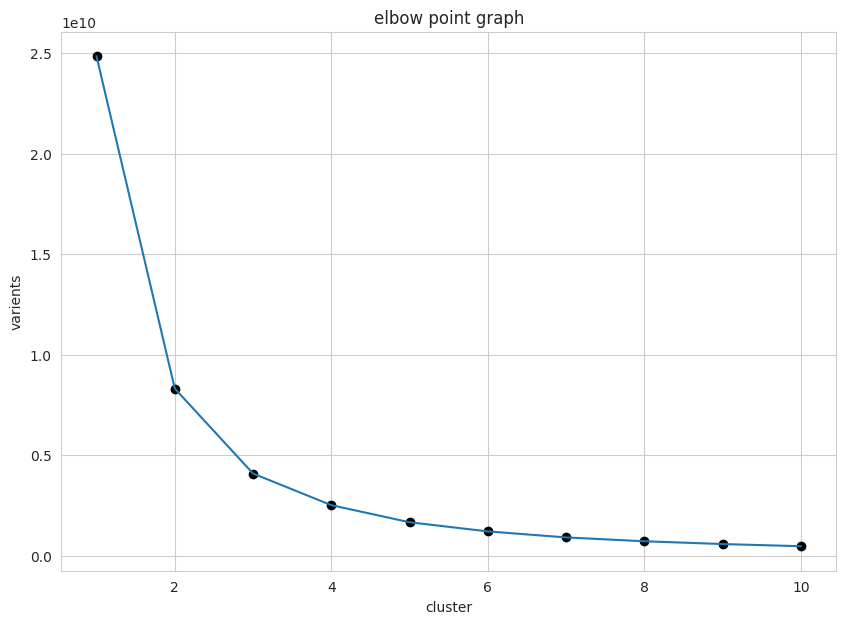

In [31]:
#plot visualization between Wcss and number of clusters
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
plt.xlabel("cluster")
plt.ylabel("varients")
plt.title("elbow point graph")
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,marker='o',color='k')


In [32]:
#k-means++ : selects initial cluster centres (centroid values/cluster means) for k-means clustering
#k-means++ algorithm selects initial data points as clusters in smart way to speed-up convergence

Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_pred=Kmeans.fit_predict(df)
y_pred

array([2, 1, 4, ..., 4, 4, 1], dtype=int32)

In [33]:
kmeans.cluster_centers_

array([[1.29375769e+01, 1.38180516e+00, 6.71285162e-02, 7.12034384e+00,
        9.82452858e+01, 1.99865401e+03, 1.15616046e+00, 2.06805158e+00,
        1.19985673e+00, 8.61638202e+02],
       [1.30689736e+01, 1.39158163e+00, 6.26265510e-02, 7.27423469e+00,
        1.76337831e+02, 1.99740179e+03, 1.09311224e+00, 2.14795918e+00,
        1.36224490e+00, 3.61989855e+03],
       [1.30252064e+01, 1.35227273e+00, 5.88065066e-02, 7.24431818e+00,
        2.18688819e+02, 1.99369318e+03, 1.09090909e+00, 2.42613636e+00,
        1.53409091e+00, 6.94525109e+03],
       [1.26959825e+01, 1.37006579e+00, 5.99173597e-02, 7.33799342e+00,
        1.44745183e+02, 1.99924753e+03, 1.14309211e+00, 2.11348684e+00,
        1.35773026e+00, 2.11851975e+03],
       [1.27779317e+01, 1.40034364e+00, 6.18852923e-02, 7.46907216e+00,
        1.97322838e+02, 1.99721993e+03, 1.16666667e+00, 2.18384880e+00,
        1.39690722e+00, 4.53799099e+03],
       [1.30530991e+01, 1.33424908e+00, 5.83015499e-02, 7.37454212e+00,
   

In [34]:
df["cluster"]=y_pred
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,9.300,1,0.016047,4,249.8092,1999,1,1,1,3735.1380,2
1,5.920,2,0.019278,14,48.2692,2009,1,3,3,443.4228,1
2,17.500,1,0.016760,10,141.6180,1999,1,1,1,2097.2700,4
3,19.200,2,0.000000,6,182.0950,1998,1,3,0,732.3800,1
4,8.930,1,0.000000,9,53.8614,1987,0,3,1,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,3,1,2778.3834,2
8519,8.380,2,0.046982,0,108.1570,2002,1,2,1,549.2850,1
8520,10.600,1,0.035186,8,85.1224,2004,2,2,1,1193.1136,4
8521,7.210,2,0.145221,13,103.1332,2009,1,3,3,1845.5976,4


In [37]:
x=df.iloc[:,:-1].values
x

array([[9.30000000e+00, 1.00000000e+00, 1.60473010e-02, ...,
        1.00000000e+00, 1.00000000e+00, 3.73513800e+03],
       [5.92000000e+00, 2.00000000e+00, 1.92782160e-02, ...,
        3.00000000e+00, 3.00000000e+00, 4.43422800e+02],
       [1.75000000e+01, 1.00000000e+00, 1.67600750e-02, ...,
        1.00000000e+00, 1.00000000e+00, 2.09727000e+03],
       ...,
       [1.06000000e+01, 1.00000000e+00, 3.51862710e-02, ...,
        2.00000000e+00, 1.00000000e+00, 1.19311360e+03],
       [7.21000000e+00, 2.00000000e+00, 1.45220646e-01, ...,
        3.00000000e+00, 3.00000000e+00, 1.84559760e+03],
       [1.48000000e+01, 1.00000000e+00, 4.48782800e-02, ...,
        1.00000000e+00, 1.00000000e+00, 7.65670000e+02]])

In [38]:
x.shape

(8523, 10)

In [39]:
y=df.iloc[:,-1].values
y

array([2, 1, 4, ..., 4, 4, 1], dtype=int32)

In [40]:
y.shape

(8523,)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[7.72000000e+00, 2.00000000e+00, 1.47904328e-01, ...,
        3.00000000e+00, 0.00000000e+00, 1.17846600e+02],
       [1.97500000e+01, 1.00000000e+00, 1.43013260e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.23039840e+03],
       [1.28576452e+01, 2.00000000e+00, 5.42206180e-02, ...,
        3.00000000e+00, 2.00000000e+00, 4.93357800e+03],
       ...,
       [1.76000000e+01, 1.00000000e+00, 1.89436660e-02, ...,
        2.00000000e+00, 1.00000000e+00, 6.14533400e+03],
       [2.03500000e+01, 3.00000000e+00, 5.43626950e-02, ...,
        2.00000000e+00, 1.00000000e+00, 1.64985240e+03],
       [1.63500000e+01, 0.00000000e+00, 1.69932040e-02, ...,
        1.00000000e+00, 1.00000000e+00, 9.65410000e+02]])

In [42]:
x_test

array([[1.43000000e+01, 1.00000000e+00, 2.62997970e-02, ...,
        3.00000000e+00, 1.00000000e+00, 1.74306440e+03],
       [7.93000000e+00, 1.00000000e+00, 7.11358700e-02, ...,
        1.00000000e+00, 1.00000000e+00, 3.56868800e+02],
       [1.45000000e+01, 2.00000000e+00, 4.13132030e-02, ...,
        1.00000000e+00, 1.00000000e+00, 3.77508600e+02],
       ...,
       [1.83500000e+01, 1.00000000e+00, 1.48938624e-01, ...,
        3.00000000e+00, 0.00000000e+00, 7.67001600e+02],
       [1.00000000e+01, 2.00000000e+00, 3.79779170e-02, ...,
        2.00000000e+00, 1.00000000e+00, 6.42497000e+02],
       [2.03500000e+01, 2.00000000e+00, 1.48228020e-02, ...,
        2.00000000e+00, 1.00000000e+00, 2.57065380e+03]])

In [43]:
y_train

array([1, 4, 0, ..., 3, 4, 1], dtype=int32)

In [44]:
y_test

array([4, 1, 1, ..., 1, 1, 2], dtype=int32)

In [45]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
a_train=scalar.fit_transform(x_train)
a_test=scalar.fit_transform(x_test)
x_train

array([[7.72000000e+00, 2.00000000e+00, 1.47904328e-01, ...,
        3.00000000e+00, 0.00000000e+00, 1.17846600e+02],
       [1.97500000e+01, 1.00000000e+00, 1.43013260e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.23039840e+03],
       [1.28576452e+01, 2.00000000e+00, 5.42206180e-02, ...,
        3.00000000e+00, 2.00000000e+00, 4.93357800e+03],
       ...,
       [1.76000000e+01, 1.00000000e+00, 1.89436660e-02, ...,
        2.00000000e+00, 1.00000000e+00, 6.14533400e+03],
       [2.03500000e+01, 3.00000000e+00, 5.43626950e-02, ...,
        2.00000000e+00, 1.00000000e+00, 1.64985240e+03],
       [1.63500000e+01, 0.00000000e+00, 1.69932040e-02, ...,
        1.00000000e+00, 1.00000000e+00, 9.65410000e+02]])

In [46]:
x_test

array([[1.43000000e+01, 1.00000000e+00, 2.62997970e-02, ...,
        3.00000000e+00, 1.00000000e+00, 1.74306440e+03],
       [7.93000000e+00, 1.00000000e+00, 7.11358700e-02, ...,
        1.00000000e+00, 1.00000000e+00, 3.56868800e+02],
       [1.45000000e+01, 2.00000000e+00, 4.13132030e-02, ...,
        1.00000000e+00, 1.00000000e+00, 3.77508600e+02],
       ...,
       [1.83500000e+01, 1.00000000e+00, 1.48938624e-01, ...,
        3.00000000e+00, 0.00000000e+00, 7.67001600e+02],
       [1.00000000e+01, 2.00000000e+00, 3.79779170e-02, ...,
        2.00000000e+00, 1.00000000e+00, 6.42497000e+02],
       [2.03500000e+01, 2.00000000e+00, 1.48228020e-02, ...,
        2.00000000e+00, 1.00000000e+00, 2.57065380e+03]])

In [47]:
#model selection
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
y_pred1

array([4, 1, 1, ..., 1, 1, 2], dtype=int32)

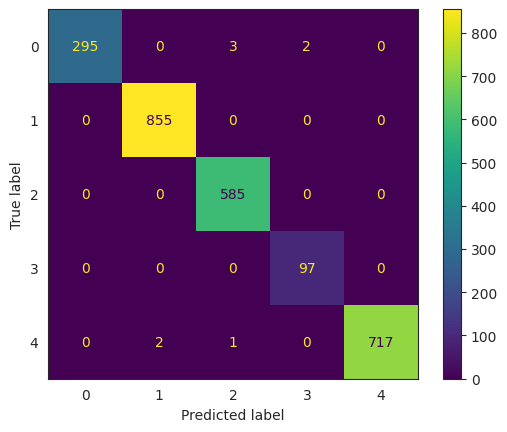

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
con=confusion_matrix(y_test,y_pred1)
label=[0,1,2,3,4]
cmd=ConfusionMatrixDisplay(con,display_labels=label)
cmd.plot()

In [49]:
con

array([[295,   0,   3,   2,   0],
       [  0, 855,   0,   0,   0],
       [  0,   0, 585,   0,   0],
       [  0,   0,   0,  97,   0],
       [  0,   2,   1,   0, 717]])

In [50]:
score=accuracy_score(y_test,y_pred1)
score

0.9968713335940556

In [51]:
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       300
           1       1.00      1.00      1.00       855
           2       0.99      1.00      1.00       585
           3       0.98      1.00      0.99        97
           4       1.00      1.00      1.00       720

    accuracy                           1.00      2557
   macro avg       0.99      1.00      0.99      2557
weighted avg       1.00      1.00      1.00      2557

